# Kartu-Verb project


The Kartu-Verb database comprises data pertaining to inflected Georgian verbs and their associated characteristics. The data is stored in a CSV file, with information organized into the following fields:

* form: The inflected form of a Georgian verb.
* tense_in_paradigm: The tense of the inflected form.
* person: The person of the inflected form (1st, 2nd, 3rd).
* number: The number of the inflected form (singular, plural).
* preverb: The preverb associated with the inflected form.
* pre2: The preradical of the inflected form.
* root: The root of the inflected form.
* sf2: The stem formant of the inflected form.
* caus_sf: The causative stem formant of the inflected form.
* ending: The ending of the inflected form.
* tsch_class: the Tschkhenkeli class to which the form belongs.
* morph_type: the morphology type to which the form belongs.
* id: Id in Clarino database to keep link to the corresponding croot.
* sub_id: Id in Clarino database to keep link to the corresponding verb paradigm.
* vn: Verbal Noun for the inflected form.

The objective of the project is to develop a model that can predict the Verbal Noun based on the provided information, including the form, tense_in_paradigm, person, number, preverb, pre2, root, sf2, caus_sf, ending, tsch_class, morph_type, id and sub_id.

# Import Libraries

Import the usual libraries for pandas and plotting. We can import sklearn later on.

In [1]:
import pandas as pd
import numpy as np
import re
%config InlineBackend.figure_formats = ['svg'] #pdf,svg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data

Read the Kartu-verb .csv file and assign it to a data frame named "kv".

In [2]:
kv = pd.read_csv('data_vn+withnotfullcroots', sep=';')

Check the head of kv.

In [3]:
kv.head(5)

,form,tense_in_paradigm,person,number,preverb,pre2,root,sf2,caus_sf,ending,tsch_class,morph_type,sub_id,id,vn
0,ვამხანაგობ,present,1,sg,-,ვ,ამხანაგ,ობ,-,-,MV,active,39-1,39,*ამხანაგობა
1,ჰამხანაგობ,present,2,sg,-,ჰ,ამხანაგ,ობ,-,-,MV,active,39-1,39,*ამხანაგობა
2,ამხანაგობ,present,2,sg,-,-,ამხანაგ,ობ,-,-,MV,active,39-1,39,*ამხანაგობა
3,ჰამხანაგობს,present,3,sg,-,ჰ,ამხანაგ,ობ,-,ს,MV,active,39-1,39,*ამხანაგობა
4,ამხანაგობს,present,3,sg,-,-,ამხანაგ,ობ,-,ს,MV,active,39-1,39,*ამხანაგობა


Display info about kv.

In [4]:
kv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294665 entries, 0 to 294664
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   form               294665 non-null  object
 1   tense_in_paradigm  294665 non-null  object
 2   person             294665 non-null  int64 
 3   number             294665 non-null  object
 4   preverb            294665 non-null  object
 5   pre2               294665 non-null  object
 6   root               294665 non-null  object
 7   sf2                294665 non-null  object
 8   caus_sf            294665 non-null  object
 9   ending             294665 non-null  object
 10  tsch_class         294665 non-null  object
 11  morph_type         294665 non-null  object
 12  sub_id             294665 non-null  object
 13  id                 294665 non-null  int64 
 14  vn                 294665 non-null  object
dtypes: int64(2), object(13)
memory usage: 33.7+ MB


Create a function to plot Missing data Ration % in kv

In [5]:
def plot_nan(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        print('How many elements are present in each files:')
        print(len(df)-df.isnull().sum())
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data=round(missing_data,0)
        print(missing_data) 
        ax=missing_data.plot.barh(figsize=(10,3))
        ax.bar_label(ax.containers[0]) #rotation=270
    else:
        print('No NAN found')

Kartu Verb Dataframe shape (rows,colomns) = (294665, 15)
How many elements are present in each files:
form                 294665
tense_in_paradigm    294665
person               294665
number               294665
preverb              169378
pre2                 264752
root                 294665
sf2                  129237
caus_sf                4706
ending               287315
tsch_class           294665
morph_type           294665
sub_id               294665
id                   294665
vn                   294665
dtype: int64
         Missing Ratio %
caus_sf             98.0
sf2                 56.0
preverb             43.0
pre2                10.0
ending               2.0


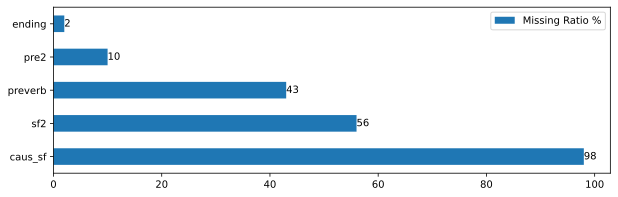

In [6]:
print('Kartu Verb Dataframe shape (rows,colomns) =',kv.shape)
plot_nan(kv.replace('-',np.nan))

Machine learning algorithms are not capable of directly processing textual data. In the case of the Kartu-Verbs database, which contains Georgian texts, it is necessary to convert the textual information into a numeric format. Additionally, it is important to handle empty values in the dataset, where empty values are denoted by a dash ("-").

To address these requirements, the following transformations were applied:
* Georgian strings were replaced with their equivalent binary representations.
* Empty values ("-") were replaced with 0.
* The 11 different values of "tense_in_paradigm" were replaced with a numerical range of [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11].
* The 28 different values of "tsch_class" were replaced with a numerical range of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27].
* The 5 different values of "morph_type" were replaced with a numerical range of [0, 1, 2, 3, 4].

Note: The values of "tsch_class" were substituted with the provided numerical range for simplicity and ease of representation.

original: IV1, IV2, IV3, IV4, KT, KT (nur mit i.O.), KT (OR), MV, P1, P2, P3, RM1, RM1 (OR), RM2, RM2 (OR), RM3, RM3 (OR), RM4, RM4(OR),RP1,RP1(mit,RP1(ohnei.O.),RP1(OR),RP2,RP2, (OR),RP3,RP3(OR),RP4,RP4(OR),RP5,RP5(OR),RP6,RP6, (OR),RP7,RP7(ohnei.O.),RP7(OR),T1,T1(OR),T2,T2(OR),T3, T3 (nur mit i.O.), T3 (OR), T4, T4 (nur mit i.O.), T4 (OR), T5, T5 (nur mit i.O.), T5 (OR), T5 (OR) (nur mit i.O.), ZP1, ZP2, ZP3

substitution: IV1, IV2, IV3, IV4, KT, MV, P1, P2, P3, RM1, RM2, RM3, RM4, RP1, RP2, RP3, RP4, RP5, RP6, RP7, T1, T2, T3, T4, T5, ZP1, ZP2, ZP3


In [7]:
kv['tense_in_paradigm'].replace(['present','imperfect','conj-present','future','conditional','conj-future','aorist','optative','perfect','pluperfect','conj-perfect'],[1,2,3,4,5,6,7,8,9,10,11], inplace=True)
kv['morph_type'].replace(['-','active','causative','passive','stative-passive'],[0,1,2,3,4], inplace=True)
kv['tsch_class'].replace(['IV1','IV2','IV3','IV4','KT','MV','P1','P2','P3','RM1','RM2','RM3','RM4','RP1','RP2','RP3','RP4','RP5','RP6','RP7','T1','T2','T3','T4','T5','ZP1','ZP2','ZP3'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], inplace=True)
kv['number'].replace(['sg','pl'],[1,2],inplace=True)
kv['preverb'].replace(['-','ა','ამო','აღ','აღმო','გა','გად','გადა','გადმო','გამო','გან','გარდ','გარდა','გარემო','გარსშემო','გარშემო','და','დამო','თანა','იავარ','მი','მიმო','მო','უკუ','შე','შემო','შთა','ჩა','ჩამო','ძალ','წა','წამო','წარ','წარმო','წინა'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34], inplace=True)
kv['pre2'].replace(['-'],['0'],inplace=True)
kv['root'].replace(['-'],['0'],inplace=True)
kv['sf2'].replace(['-','ავ','ამ','ე','ებ','ევ','ვ','ი','მ','ობ','ოფ'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
kv['caus_sf'].replace(['-','ევინ','ინ'],[0,1,2],inplace=True)
kv['ending'].replace(['-'],['0'],inplace=True)
kv['sub_id'].replace('.*-','',regex=True,inplace=True)
kv['vn'].replace(['-'],['0'],inplace=True)

In [8]:
kv[['sub_id']] = kv[['sub_id']].apply(pd.to_numeric) #to convert sub_id object type to int64
#print(kv['sub_id'])

**In the UTF-8 encoding scheme, Georgian characters are represented by three bytes. The first two bytes are redundant for the conversion process. To convert Georgian text into a numeric representation, we extract the last byte from each character and sum their decimal values. For this purpose, we created the following function.**

In [9]:
def str2dec(x): #To sum last byte decimal versions for each character of a given string x
    s=0
    for i in x:
        s+=ord(i.encode('utf8')[-1:])
    return s

Subsequently, we incorporated additional fields into the "kv" dataframe, specifically "formd", "preverbd", "pre2d", "rootd", "caus_sfd", "sf2d", and "endingd". These newly introduced fields correspond to the decimal representations of the original fields, namely "form", "preverb", "pre2", "root", "caus_sf", "sf2", and "ending". The purpose of including these fields is to store the converted decimal representations of the respective values.

In [10]:
#To convert a Georgian string into the sum of its characters' decimal representations,
kv['formd'] = kv['form'].apply(lambda x: str2dec(x))
kv['pre2d'] = kv['pre2'].apply(lambda x: str2dec(x))
kv['rootd'] = kv['root'].apply(lambda x: str2dec(x))
kv['endingd'] = kv['ending'].apply(lambda x: str2dec(x))
kv['vnd'] = kv['vn'].apply(lambda x: str2dec(x))

Let's encode the field "vn2d" by enumerating its values from 1 to N, and store this encoding information in a dictionary called "index_vn2."

In [11]:
index_vn = {}
vn_new_list = []

for i in kv['vn']:
    if i not in index_vn:
        index_vn[i] = len(index_vn)
    vn_new_list.append(index_vn[i])

kv['vnd']=vn_new_list

To store the Vn indexation in the file "vn_index.txt"

In [12]:
#print(index_vn)
with open('vn_index.txt','w') as data:
    data.write(str(index_vn))

In [13]:
#print(kv['vn'],kv['vnd'])
#print(kv['vnd'])

To facilitate further investigation, we can save the corresponding text and numeric representations for the "forms" and "verbal nouns" separately in individual files. This separation will allow for easier analysis and examination of the data.

In [14]:
kv[['form','formd']].to_csv('form_formd.csv',sep=',')
kv[['vn','vnd']].to_csv('vn_vnd.csv',sep=',')

In [15]:
kv.describe()

,tense_in_paradigm,person,number,preverb,sf2,caus_sf,tsch_class,morph_type,sub_id,id,formd,pre2d,rootd,endingd,vnd
count,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000
mean,6.248808,2.112463,1.531186,7.731376,1.894341,0.018000,14.402491,1.814467,25.888063,2059.900219,1584.826030,209.925461,537.729503,519.076823,250.425222
std,3.137606,0.813681,0.499027,9.993178,2.502208,0.147428,8.049219,0.893504,27.425140,1214.070507,458.701246,109.475591,211.782085,294.146656,137.672942
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,39.000000,289.000000,48.000000,145.000000,48.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000,1.000000,7.000000,904.000000,1235.000000,148.000000,461.000000,299.000000,140.000000
50%,7.000000,2.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.000000,16.000000,2154.000000,1541.000000,163.000000,484.000000,451.000000,239.000000
75%,9.000000,3.000000,2.000000,16.000000,4.000000,0.000000,22.000000,3.000000,38.000000,3218.000000,1867.000000,294.000000,638.000000,744.000000,368.000000
max,11.000000,3.000000,2.000000,33.000000,9.000000,2.000000,28.000000,4.000000,222.000000,3844.000000,3803.000000,1075.000000,1394.000000,1687.000000,493.000000


In [16]:
kv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294665 entries, 0 to 294664
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   form               294665 non-null  object
 1   tense_in_paradigm  294665 non-null  int64 
 2   person             294665 non-null  int64 
 3   number             294665 non-null  int64 
 4   preverb            294665 non-null  int64 
 5   pre2               294665 non-null  object
 6   root               294665 non-null  object
 7   sf2                294665 non-null  int64 
 8   caus_sf            294665 non-null  int64 
 9   ending             294665 non-null  object
 10  tsch_class         294665 non-null  int64 
 11  morph_type         294665 non-null  int64 
 12  sub_id             294665 non-null  int64 
 13  id                 294665 non-null  int64 
 14  vn                 294665 non-null  object
 15  formd              294665 non-null  int64 
 16  pre2d              2

# Setting up the Data
* Create a new dataframe called "kn_n" where we will retain only the number representation of the data.
* Simplify the dataframe by renaming the "tense_in_paradigm" column to "tense" for the sake of simplicity and clarity.

In [17]:
kv_n = kv.loc[:,['formd','tense_in_paradigm','person','number','preverb','pre2d','rootd','sf2','caus_sf','endingd','tsch_class','morph_type','sub_id','id','vnd']]
kv_n.rename(columns={'tense_in_paradigm':'tense'}, inplace=True) # just rename 'tense_in_paradigm' with 'tense' for simplicity

To free up Memory, you can delete the "kv" dataframe.

In [18]:
del kv

In [19]:
kv_n.describe()

,formd,tense,person,number,preverb,pre2d,rootd,sf2,caus_sf,endingd,tsch_class,morph_type,sub_id,id,vnd
count,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000,294665.000000
mean,1584.826030,6.248808,2.112463,1.531186,7.731376,209.925461,537.729503,1.894341,0.018000,519.076823,14.402491,1.814467,25.888063,2059.900219,250.425222
std,458.701246,3.137606,0.813681,0.499027,9.993178,109.475591,211.782085,2.502208,0.147428,294.146656,8.049219,0.893504,27.425140,1214.070507,137.672942
min,289.000000,1.000000,1.000000,1.000000,0.000000,48.000000,145.000000,0.000000,0.000000,48.000000,1.000000,1.000000,1.000000,39.000000,0.000000
25%,1235.000000,3.000000,1.000000,1.000000,0.000000,148.000000,461.000000,0.000000,0.000000,299.000000,6.000000,1.000000,7.000000,904.000000,140.000000
50%,1541.000000,7.000000,2.000000,2.000000,1.000000,163.000000,484.000000,0.000000,0.000000,451.000000,14.000000,1.000000,16.000000,2154.000000,239.000000
75%,1867.000000,9.000000,3.000000,2.000000,16.000000,294.000000,638.000000,4.000000,0.000000,744.000000,22.000000,3.000000,38.000000,3218.000000,368.000000
max,3803.000000,11.000000,3.000000,2.000000,33.000000,1075.000000,1394.000000,9.000000,2.000000,1687.000000,28.000000,4.000000,222.000000,3844.000000,493.000000


In [20]:
kv_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294665 entries, 0 to 294664
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   formd       294665 non-null  int64
 1   tense       294665 non-null  int64
 2   person      294665 non-null  int64
 3   number      294665 non-null  int64
 4   preverb     294665 non-null  int64
 5   pre2d       294665 non-null  int64
 6   rootd       294665 non-null  int64
 7   sf2         294665 non-null  int64
 8   caus_sf     294665 non-null  int64
 9   endingd     294665 non-null  int64
 10  tsch_class  294665 non-null  int64
 11  morph_type  294665 non-null  int64
 12  sub_id      294665 non-null  int64
 13  id          294665 non-null  int64
 14  vnd         294665 non-null  int64
dtypes: int64(15)
memory usage: 33.7 MB


To reduce the memory usage of a variable, we consider changing its data type to a less memory-intensive alternative.

In [21]:
print(kv_n.dtypes)
print(kv_n['tense'].dtypes)

formd         int64
tense         int64
person        int64
number        int64
preverb       int64
pre2d         int64
rootd         int64
sf2           int64
caus_sf       int64
endingd       int64
tsch_class    int64
morph_type    int64
sub_id        int64
id            int64
vnd           int64
dtype: object
int64


In [22]:
#OLD syntax
# 2.4.2 Anaconda3 version warning message: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

#kv_n.loc[:,'formd']=kv_n.loc[:,'formd'].astype('int16')
#kv_n.loc[:,'tense']=kv_n.loc[:,'tense'].astype('byte')
#kv_n.loc[:,'person']=kv_n.loc[:,'person'].astype('byte')
#kv_n.loc[:,'number']=kv_n.loc[:,'number'].astype('byte')
##kv_n.loc[:,'preverbd']=kv_n.loc[:,'preverbd'].astype('int16')
#kv_n.loc[:,'preverb']=kv_n.loc[:,'preverb'].astype('byte')
#kv_n.loc[:,'pre2d']=kv_n.loc[:,'pre2d'].astype('int16')
#kv_n.loc[:,'rootd']=kv_n.loc[:,'rootd'].astype('int16')
##kv_n.loc[:,'sf2d']=kv_n.loc[:,'sf2d'].astype('int16')
#kv_n.loc[:,'sf2']=kv_n.loc[:,'sf2'].astype('byte')
#kv_n.loc[:,'caus_sf']=kv_n.loc[:,'caus_sf'].astype('byte')
##kv_n.loc[:,'caus_sfd']=kv_n.loc[:,'caus_sfd'].astype('int16')
#kv_n.loc[:,'endingd']=kv_n.loc[:,'endingd'].astype('int16')
#kv_n.loc[:,'tsch_class']=kv_n.loc[:,'tsch_class'].astype('byte')
#kv_n.loc[:,'morph_type']=kv_n.loc[:,'morph_type'].astype('byte')
#kv_n.loc[:,'id']=kv_n.loc[:,'id'].astype('int16')
#kv_n.loc[:,'sub_id']=kv_n.loc[:,'sub_id'].astype('int16') #float16
#kv_n.loc[:,'vnd']=kv_n.loc[:,'vnd'].astype('int16')


#New syntax.
kv_n[kv_n.columns[0]]=kv_n.loc[:,'formd'].astype('int16')
kv_n[kv_n.columns[1]]=kv_n.loc[:,'tense'].astype('byte')
kv_n[kv_n.columns[2]]=kv_n.loc[:,'person'].astype('byte')
kv_n[kv_n.columns[3]]=kv_n.loc[:,'number'].astype('byte')
kv_n[kv_n.columns[4]]=kv_n.loc[:,'preverb'].astype('byte')
kv_n[kv_n.columns[5]]=kv_n.loc[:,'pre2d'].astype('int16')
kv_n[kv_n.columns[6]]=kv_n.loc[:,'rootd'].astype('int16')
kv_n[kv_n.columns[7]]=kv_n.loc[:,'sf2'].astype('byte')
kv_n[kv_n.columns[8]]=kv_n.loc[:,'caus_sf'].astype('byte')
kv_n[kv_n.columns[9]]=kv_n.loc[:,'endingd'].astype('int16')
kv_n[kv_n.columns[10]]=kv_n.loc[:,'tsch_class'].astype('byte')
kv_n[kv_n.columns[11]]=kv_n.loc[:,'morph_type'].astype('byte')
kv_n[kv_n.columns[12]]=kv_n.loc[:,'id'].astype('int16')
kv_n[kv_n.columns[13]]=kv_n.loc[:,'sub_id'].astype('int16') #float16
kv_n[kv_n.columns[14]]=kv_n.loc[:,'vnd'].astype('int16')

# To convert dataframe types I used this simple method as well. it gives score 1 but with worse results in solution.csv
# Without convertion (if we remian default types) it gives also score 1 but with worse results in solution.csv
# No idea WHY?

#kv_n['formd']=kv_n['formd'].astype('int16')
#kv_n['tense']=kv_n['tense'].astype('byte')
#kv_n['person']=kv_n['person'].astype('byte')
#kv_n['number']=kv_n['number'].astype('byte')
#kv_n['preverb']=kv_n['preverb'].astype('byte')
#kv_n['pre2d']=kv_n['pre2d'].astype('int16')
#kv_n['rootd']=kv_n['rootd'].astype('int16')
#kv_n['sf2']=kv_n['sf2'].astype('byte')
#kv_n['caus_sf']=kv_n['caus_sf'].astype('byte')
#kv_n['endingd']=kv_n['endingd'].astype('int16')
#kv_n['tsch_class']=kv_n['tsch_class'].astype('byte')
#kv_n['morph_type']=kv_n['morph_type'].astype('byte')
#kv_n['id']=kv_n['id'].astype('int16')
#kv_n['sub_id']=kv_n['sub_id'].astype('int16')
#kv_n['vnd']=kv_n['vnd'].astype('int16')

We can examine the new dataframe.

In [23]:
kv_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294665 entries, 0 to 294664
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   formd       294665 non-null  int16
 1   tense       294665 non-null  int8 
 2   person      294665 non-null  int8 
 3   number      294665 non-null  int8 
 4   preverb     294665 non-null  int8 
 5   pre2d       294665 non-null  int16
 6   rootd       294665 non-null  int16
 7   sf2         294665 non-null  int8 
 8   caus_sf     294665 non-null  int8 
 9   endingd     294665 non-null  int16
 10  tsch_class  294665 non-null  int8 
 11  morph_type  294665 non-null  int8 
 12  sub_id      294665 non-null  int16
 13  id          294665 non-null  int16
 14  vnd         294665 non-null  int16
dtypes: int16(7), int8(8)
memory usage: 6.2 MB


In [24]:
print(kv_n)

        formd  tense  person  number  preverb  pre2d  rootd  sf2  caus_sf  \
0        1514      1       1       1        0    149   1063    9        0   
1        1541      1       2       1        0    176   1063    9        0   
2        1365      1       2       1        0     48   1063    9        0   
3        1702      1       3       1        0    176   1063    9        0   
4        1526      1       3       1        0     48   1063    9        0   
...       ...    ...     ...     ...      ...    ...    ...  ...      ...   
294660   1097      7       2       1        0    653    444    0        0   
294661    937      1       1       1       24    301    320    0        0   
294662    788      1       2       1       24    152    320    0        0   
294663    937      4       1       1       24    301    320    0        0   
294664    788      4       2       1       24    152    320    0        0   

        endingd  tsch_class  morph_type  sub_id    id  vnd  
0            4

## Decision Tree Model - Solution

## Train Test Split

Now, we will proceed with the task of dividing our data into a training set and a testing set.

To accomplish this, we will use the functionality provided by the scikit-learn library. This allows us to easily split our data into two distinct sets: one for training our model and the other for evaluating its performance.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = kv_n.drop('vnd',axis=1)
y = kv_n['vnd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [27]:
#print(X_test)
#print(y)
#X_test.to_csv(r'X_test.txt', index=None, sep=';')

Import DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [31]:
predictions = dtree.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00       219
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        45
           8       1.00      1.00      1.00        64
           9       1.00      1.00      1.00        44
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00       146
          12       1.00      1.00      1.00        44
          13       1.00      1.00      1.00       151
          14       1.00      1.00      1.00        38
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00        36
          17       1.00    

To store the clssificaion report in the file "report.txt"

In [34]:
report = classification_report(y_test,predictions)
report_path = "report.txt"
text_file = open(report_path,"w")
n = text_file.write(report)
text_file.close()

In [35]:
print(confusion_matrix(y_test,predictions))
cm = confusion_matrix(y_test,predictions)

[[ 37   0   0 ...   0   0   0]
 [  0 200   0 ...   0   0   0]
 [  0   0 150 ...   0   0   0]
 ...
 [  0   0   0 ...   8   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   4]]


# Prepare test data from a file

To prepare the test data from a file, we have the "data_vn-.csv" file that includes all the fields except for the Verbal Noun. It is particularly intriguing to observe how our trained model performs in predicting the missing Verbal Nouns.

The file "data_vn-.csv" consists of 599813 lines and will serve as our test dataset for evaluating the model's ability to predict the missing Verbal Nouns.

## Get the Data
Read in the "data_vn-.csv" file and set it to a data frame called kv.

In [36]:
X_test2 = pd.read_csv('data_vn-', sep=';')

Check the head of the kv dataframe.

In [37]:
#print(X_test2)
Solution = X_test2.copy()

In [38]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599812 entries, 0 to 599811
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   form               599812 non-null  object
 1   tense_in_paradigm  599812 non-null  object
 2   person             599812 non-null  int64 
 3   number             599812 non-null  object
 4   preverb            599812 non-null  object
 5   pre2               599812 non-null  object
 6   root               599812 non-null  object
 7   sf2                599812 non-null  object
 8   caus_sf            599812 non-null  object
 9   ending             599812 non-null  object
 10  tsch_class         599812 non-null  object
 11  morph_type         599812 non-null  object
 12  sub_id             599812 non-null  object
 13  id                 599812 non-null  int64 
 14  vn                 599812 non-null  object
dtypes: int64(2), object(13)
memory usage: 68.6+ MB


To prepare the data, we will proceed with converting the textual information into a numeric representation. This conversion is necessary to enable the utilization of machine learning algorithms that operate on numerical data.

In [39]:
X_test2['tense_in_paradigm'].replace(['present','imperfect','conj-present','future','conditional','conj-future','aorist','optative','perfect','pluperfect','conj-perfect'],[1,2,3,4,5,6,7,8,9,10,11], inplace=True)
X_test2['morph_type'].replace(['-','active','causative','passive','stative-passive'],[0,1,2,3,4], inplace=True)
X_test2['tsch_class'].replace(['IV1','IV2','IV3','IV4','KT','MV','P1','P2','P3','RM1','RM2','RM3','RM4','RP1','RP2','RP3','RP4','RP5','RP6','RP7','T1','T2','T3','T4','T5','ZP1','ZP2','ZP3'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], inplace=True)
X_test2['number'].replace(['sg','pl'],[1,2],inplace=True)
# in test data there are 15 more preverebs
#X_test2['preverb'].replace(['-','ა','ამო','აღ','აღმო','გა','გად','გადა','გადმო','გამო','გან','გარდ','გარდა','გარემო','გარსშემო','გარშემო','და','დამო','თანა','იავარ','მი','მიმო','მო','უკუ','შე','შემო','შთა','ჩა','ჩამო','ძალ','წა','წამო','წარ','წარმო','წინა'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34], inplace=True)
X_test2['preverb'].replace(['-','ა','ამო','აღ','აღმო','გა','გად','გადა','გადმო','გამო','გან','გარდ','გარდა','გარემო','გარსშემო','გარშემო','და','დამო','თანა','იავარ','მი','მიმო','მო','უკუ','შე','შემო','შთა','ჩა','ჩამო','ძალ','წა','წამო','წარ','წარმო','წინა','გარდმო','ზეწამო','იძულებულ','ნათელ','სრულ','უარ','უგულებელ','უვნებელ','უზრუნველ','უკვდავ','უჩინარ','ღაღად','შეურაცხ','ცხად','ხელ','წინააღ'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50], inplace=True)
X_test2['pre2'].replace(['-'],['0'],inplace=True)
X_test2['root'].replace(['-'],['0'],inplace=True)
X_test2['sf2'].replace(['-','ავ','ამ','ე','ებ','ევ','ვ','ი','მ','ობ','ოფ'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
X_test2['caus_sf'].replace(['-','ევინ','ინ'],[0,1,2],inplace=True)
X_test2['ending'].replace(['-'],['0'],inplace=True)
X_test2['sub_id'].replace('.*-','',regex=True,inplace=True)

In [40]:
X_test2[['sub_id']] = X_test2[['sub_id']].apply(pd.to_numeric)

In [41]:
X_test2['formd'] = X_test2['form'].apply(lambda x: str2dec(x))
X_test2['pre2d'] = X_test2['pre2'].apply(lambda x: str2dec(x))
X_test2['rootd'] = X_test2['root'].apply(lambda x: str2dec(x))
X_test2['endingd'] = X_test2['ending'].apply(lambda x: str2dec(x))

In [42]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599812 entries, 0 to 599811
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   form               599812 non-null  object
 1   tense_in_paradigm  599812 non-null  int64 
 2   person             599812 non-null  int64 
 3   number             599812 non-null  int64 
 4   preverb            599812 non-null  int64 
 5   pre2               599812 non-null  object
 6   root               599812 non-null  object
 7   sf2                599812 non-null  int64 
 8   caus_sf            599812 non-null  int64 
 9   ending             599812 non-null  object
 10  tsch_class         599812 non-null  int64 
 11  morph_type         599812 non-null  int64 
 12  sub_id             599812 non-null  int64 
 13  id                 599812 non-null  int64 
 14  vn                 599812 non-null  object
 15  formd              599812 non-null  int64 
 16  pre2d              5

In [43]:
X_test2 = X_test2.loc[:,['formd','tense_in_paradigm','person','number','preverb','pre2d','rootd','sf2','caus_sf','endingd','tsch_class','morph_type','sub_id','id']]
X_test2.rename(columns={'tense_in_paradigm':'tense'}, inplace=True) # just rename 'tense_in_paradigm' with 'tense' for simplicity

In [44]:
#X_test2.loc[:,'formd']=X_test2.loc[:,'formd'].astype('int16')
#X_test2.loc[:,'tense']=X_test2.loc[:,'tense'].astype('byte')
#X_test2.loc[:,'person']=X_test2.loc[:,'person'].astype('byte')
#X_test2.loc[:,'number']=X_test2.loc[:,'number'].astype('byte')
##X_test2.loc[:,'preverbd']=X_test2.loc[:,'preverbd'].astype('int16')
#X_test2.loc[:,'preverb']=X_test2.loc[:,'preverb'].astype('byte')
#X_test2.loc[:,'pre2d']=X_test2.loc[:,'pre2d'].astype('int16')
#X_test2.loc[:,'rootd']=X_test2.loc[:,'rootd'].astype('int16')
##X_test2.loc[:,'sf2d']=X_test2.loc[:,'sf2d'].astype('int16')
#X_test2.loc[:,'sf2']=X_test2.loc[:,'sf2'].astype('byte')
##X_test2.loc[:,'caus_sfd']=X_test2.loc[:,'caus_sfd'].astype('int16')
#X_test2.loc[:,'caus_sf']=X_test2.loc[:,'caus_sf'].astype('byte')
#X_test2.loc[:,'endingd']=X_test2.loc[:,'endingd'].astype('int16')
#X_test2.loc[:,'tsch_class']=X_test2.loc[:,'tsch_class'].astype('int16')
#X_test2.loc[:,'morph_type']=X_test2.loc[:,'morph_type'].astype('int16')
#X_test2.loc[:,'id']=X_test2.loc[:,'id'].astype('int16')
#X_test2.loc[:,'sub_id']=X_test2.loc[:,'sub_id'].astype('int16')

#New syntax
X_test2[X_test2.columns[0]]=X_test2.loc[:,'formd'].astype('int16')
X_test2[X_test2.columns[1]]=X_test2.loc[:,'tense'].astype('byte')
X_test2[X_test2.columns[2]]=X_test2.loc[:,'person'].astype('byte')
X_test2[X_test2.columns[3]]=X_test2.loc[:,'number'].astype('byte')
X_test2[X_test2.columns[4]]=X_test2.loc[:,'preverb'].astype('byte')
X_test2[X_test2.columns[5]]=X_test2.loc[:,'pre2d'].astype('int16')
X_test2[X_test2.columns[6]]=X_test2.loc[:,'rootd'].astype('int16')
X_test2[X_test2.columns[7]]=X_test2.loc[:,'sf2'].astype('byte')
X_test2[X_test2.columns[8]]=X_test2.loc[:,'caus_sf'].astype('byte')
X_test2[X_test2.columns[9]]=X_test2.loc[:,'endingd'].astype('int16')
X_test2[X_test2.columns[10]]=X_test2.loc[:,'tsch_class'].astype('byte')
X_test2[X_test2.columns[11]]=X_test2.loc[:,'morph_type'].astype('byte')
X_test2[X_test2.columns[12]]=X_test2.loc[:,'id'].astype('int16')
X_test2[X_test2.columns[13]]=X_test2.loc[:,'sub_id'].astype('int16') #float16

#X_test2['formd']=X_test2['formd'].astype('int16')
#X_test2['tense']=X_test2['tense'].astype('byte')
#X_test2['person']=X_test2['person'].astype('byte')
#X_test2['number']=X_test2['number'].astype('byte')
#X_test2['preverb']=X_test2['preverb'].astype('byte')
#X_test2['pre2d']=X_test2['pre2d'].astype('int16')
#X_test2['rootd']=X_test2['rootd'].astype('int16')
#X_test2['sf2']=X_test2['sf2'].astype('byte')
#X_test2['caus_sf']=X_test2['caus_sf'].astype('byte')
#X_test2['endingd']=X_test2['endingd'].astype('int16')
#X_test2['tsch_class']=X_test2['tsch_class'].astype('byte')
#X_test2['morph_type']=X_test2['morph_type'].astype('byte')
#X_test2['id']=X_test2['id'].astype('int16')
#X_test2['sub_id']=X_test2['sub_id'].astype('int16')


In [45]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599812 entries, 0 to 599811
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   formd       599812 non-null  int16
 1   tense       599812 non-null  int8 
 2   person      599812 non-null  int8 
 3   number      599812 non-null  int8 
 4   preverb     599812 non-null  int8 
 5   pre2d       599812 non-null  int16
 6   rootd       599812 non-null  int16
 7   sf2         599812 non-null  int8 
 8   caus_sf     599812 non-null  int8 
 9   endingd     599812 non-null  int16
 10  tsch_class  599812 non-null  int8 
 11  morph_type  599812 non-null  int8 
 12  sub_id      599812 non-null  int16
 13  id          599812 non-null  int16
dtypes: int16(6), int8(8)
memory usage: 11.4 MB


In [46]:
#print(X_test2)

## Predictions and Evaluation of Decision Tree
Generate predictions from the test set and then create a classification report and a confusion matrix to evaluate the performance of the model.

In [47]:
predictions2 = dtree.predict(X_test2)

In [48]:
print(predictions2)

with open('predictions2.txt', 'w') as f:
    for line in predictions2:
        f.write(f"{line}\n")

[  1   1   1 ... 475 475 475]


After generating predictions from the test set, we will proceed to decode the numeric predictions back into their original Georgian text representations. This step allows us to interpret and analyze the model's outputs in a more understandable and meaningful manner. By converting the numeric predictions back to Georgian text, we can gain insights into the predicted outcomes and assess the model's performance in a linguistically meaningful context.

In [49]:
tmppd = pd.DataFrame({'vn': predictions2})
print(tmppd)
#To reverse index_vn2 - swap keys:values.
index_vn_rev = {i: j for j, i in index_vn.items()}
print(index_vn)
Solution['vn'] = tmppd.replace(index_vn_rev)
#print(Solution)

         vn
0         1
1         1
2         1
3         1
4         1
...     ...
599807  475
599808  475
599809  475
599810  475
599811  475

[599812 rows x 1 columns]
{'*ამხანაგობა': 0, '*ამხანაგება': 1, '*ახლოვება': 2, '*ახლოვებინება': 3, '*ბარება': 4, '*ბარებინება': 5, '*ბარბაც': 6, '*ბარბაცება': 7, '*ბარგება': 8, '*ბარგებინება': 9, '*ბაჯბაჯებ': 10, '*ბერვა': 11, '*ბერვინება': 12, '*ბეჭდვა': 13, '*ბეჭდვინება': 14, '*ბიჯება': 15, '*ბიჯებინება': 16, '*ბმა': 17, '*ბმევინება': 18, '*ბნედა': 19, '*ბნედინება': 20, '*ბნევა': 21, '*ბნევინება': 22, '*ბობღვა': 23, '*ბორძიკება': 24, '*ბრალობა': 25, '*ბრალება': 26, '*ბრიალ': 27, '*ბრიალება': 28, '*ბრუნვა': 29, '*ბრუნება': 30, '*ბრუნებინება': 31, '*ბრძანება': 32, '*ბრძანებინება': 33, '*ბრძოლება': 34, '*ბუზღუნ': 35, '*ბუზღუნება': 36, '*ბურვა': 37, '*ბურვინება': 38, '*ბურთაობა': 39, '*ბურთავება': 40, '*ბურტყუნ': 41, '*ბურტყუნება': 42, '*ბჯენა': 43, '*ბჯენინება': 44, '*გვანება': 45, '*გდება': 46, '*გდებინება': 47, '*გება': 48, '*გებინება': 49, '

In [50]:
Solution.to_csv('solution.csv', index=False, sep=';')

# Conclusion

The decision tree model has demonstrated excellent predictive capabilities. We conducted multiple runs of the model on the same dataset, each time using a different random_state parameter for the training and testing data split. Remarkably, in all runs, the model consistently produced identical results.

The model provides predictions with a very approximate probability of 100%, as detailed in the **report.txt** file. These probabilities offer insights into the model's confidence levels for each prediction.

The corresponding outcomes can be accessed in the **solution.csv** file, which presents the predicted results derived from the decision tree model.